In [1]:
from math import sin, cos, fsum
import numpy as np


def sinc_integrand(p, a, ns):
    """
    Compute integrand values at nodes

    Parameters:
        p  - power
        a  - left integration limit
        ns - nodes

    Returns:
        Integrand values
    """
    ph = np.arctan2(ns, a) * p
    d = a * a + ns * ns
    if p == 1.0:
        d = np.sqrt(d)
    elif p != 2.0:
        d = np.power(d, 0.5 * p)
    return (cos(a) * np.cos(ph) + sin(a) * np.sin(ph)) / d


def integrate_sinc(p, a, deg=32):
    """
    Compute int_a^\infty \sin{x} / x^p dx

    Parameters:
        p   - power
        a   - left integration limit
        deg - Gauss-Laguerre quadrature degree

    Returns:
        Integral value
    """
    ns, ws = np.polynomial.laguerre.laggauss(deg)
    return fsum(sinc_integrand(p, a, ns) * ws)

In [2]:
a = 1000
p = 2.0

integrate_sinc(p, a, 128)

5.640294413202778e-07

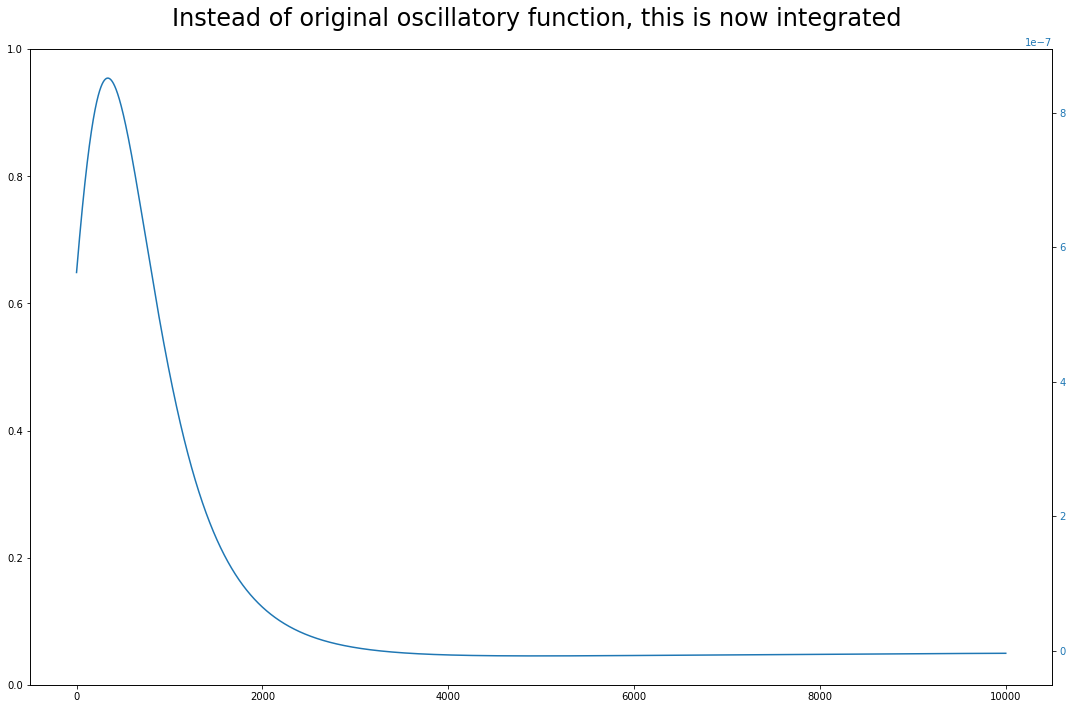

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

x = np.arange(0.0, 10000.0, 1.0)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

y = sinc_integrand(p, a, x)
ax2.plot(x, y, color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

fig.suptitle("Instead of original oscillatory function, this is now integrated", fontsize=24)
fig.tight_layout()